# **A. Import Libraries**

In [1]:
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Scikitlearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder 

# Algorithma
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Handling 
from scipy.stats import kendalltau, chi2_contingency # Correlasi Check
from feature_engine.outliers import Winsorizer # Handling Outlier

# Metriks
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, f1_score, recall_score

# Gridsearch
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

# Save model
import pickle
import json

pd.options.display.max_columns = None

# **B. Data Loading**

In [2]:
# Load data and search for information related to tables
# read file .csv
dataset = pd.read_csv('diabetes_data.csv')

# Displays the top 10 data
dataset.head(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


In [3]:
# Displays the last 10 data
dataset.tail(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
70682,9.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,30.0,1.0,0.0,1.0,1.0
70683,10.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
70684,9.0,1.0,1.0,1.0,27.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,30.0,5.0,0.0,0.0,1.0,1.0
70685,7.0,0.0,0.0,1.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
70686,11.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,30.0,0.0,0.0,0.0,1.0
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0
70691,9.0,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
# Displays the number of data and columns
dataset.shape

(70692, 18)

In [5]:
# Displays dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [6]:
# Displays the dataset description
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


In this dataset, there are:
- 70692 rows of data,
- 18 columns of float type


# **C. Data Cleaning**

At the data cleaning stage, the following will be carried out:
- Check and handle duplicate data
- Check for zero funds
- Re-encode
- Changing data types
- Save data that has been cleaned

In [3]:
# Duplicate the dataset
dataCleaning = dataset.copy()

In [4]:
# Cek duplikat data
dataCleaning.duplicated().sum()

6672

In [5]:
# Handle data duplikat
dataCleaning = dataCleaning.drop_duplicates()

In [6]:
# Cek duplikat data
dataCleaning.duplicated().sum()

0

In [7]:
# Cek data null
dataCleaning.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [8]:
# reencode
dataCleaning['Sex'] = dataCleaning['Sex'].map({0:'female', 1:'male'})
dataCleaning['HighChol'] = dataCleaning['HighChol'].map({0:'no high', 1:'high'})
dataCleaning['CholCheck'] = dataCleaning['CholCheck'].map({0:'no', 1:'yes'})
dataCleaning['Smoker'] = dataCleaning['Smoker'].map({0:'no', 1:'yes'})
dataCleaning['HeartDiseaseorAttack'] = dataCleaning['HeartDiseaseorAttack'].map({0:'no', 1:'yes'})
dataCleaning['PhysActivity'] = dataCleaning['PhysActivity'].map({0:'no', 1:'yes'})
dataCleaning['Fruits'] = dataCleaning['Fruits'].map({0:'no', 1:'yes'})
dataCleaning['Veggies'] = dataCleaning['Veggies'].map({0:'no', 1:'yes'})
dataCleaning['HvyAlcoholConsump'] = dataCleaning['HvyAlcoholConsump'].map({0:'no', 1:'yes'})
dataCleaning['GenHlth'] = dataCleaning['GenHlth'].map({1:'excellent ', 2:'very good',3:'good', 4:'fair', 5:'poor'})
dataCleaning['DiffWalk'] = dataCleaning['DiffWalk'].map({0:'no', 1:'yes'})
dataCleaning['Stroke'] = dataCleaning['Stroke'].map({0:'no', 1:'yes'})
dataCleaning['HighBP'] = dataCleaning['HighBP'].map({0:'no high', 1:'high'})

In [9]:
# change the data type
dataCleaning['Age'] = dataCleaning['Age'].astype('int64')
dataCleaning['BMI'] = dataCleaning['BMI'].astype('int64')
dataCleaning['MentHlth'] = dataCleaning['MentHlth'].astype('int64')
dataCleaning['PhysHlth'] = dataCleaning['PhysHlth'].astype('int64')
dataCleaning['Diabetes'] = dataCleaning['Diabetes'].astype('int64')

In [10]:
dataCleaning.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4,male,no high,yes,26,no,no,yes,no,yes,no,good,5,30,no,no,high,0
1,12,male,high,yes,26,yes,no,no,yes,no,no,good,0,0,no,yes,high,0
2,13,male,no high,yes,26,no,no,yes,yes,yes,no,excellent,0,10,no,no,no high,0
3,11,male,high,yes,28,yes,no,yes,yes,yes,no,good,0,3,no,no,high,0
4,8,female,no high,yes,29,yes,no,yes,yes,yes,no,very good,0,0,no,no,no high,0


In [11]:
dataCleaning.shape

(64020, 18)

In [14]:
# Create CSV data from cleaned data
dataCleaning.to_csv('diabetes_data_cleaning1.csv', index=False)

- Duplicate data was found at index 6672 and was successfully handled by deleting it
- No null data was found in this dataset
- Re-encoding several columns
- Changed the float data type to Integer
- Total data after cleaning is 64020 data


# **D. Exploratory Data Analysis (EDA)**

In [15]:
#  Duplicates data
dataEDA = dataCleaning.copy()

## **1. Age Distribution**

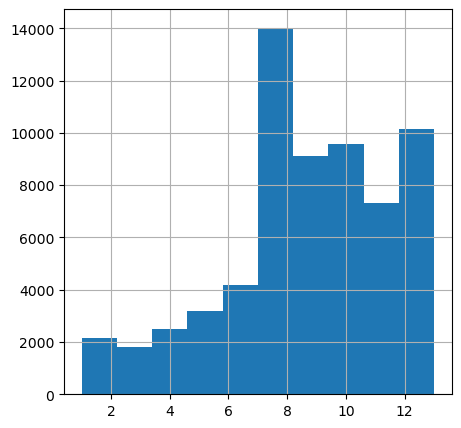

In [23]:
# histogram chart
dataEDA['Age'].hist(figsize=(5,5))
plt.show()

Insight:
- The distribution in the Age column is highest in groups 7 and 8

## **2. Distribution of Diabetes**

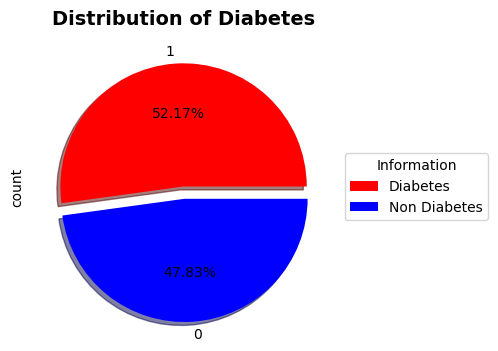

In [16]:
# pie chart
fig,ax1 = plt.subplots(figsize=(4,4))
dataEDA['Diabetes'].value_counts().plot(kind='pie',shadow=True, explode=(0,0.1), autopct='%.2f%%',ax=ax1, colors=['red', 'blue'])
plt.title("Distribution of Diabetes",fontsize=14, fontweight='bold') 
plt.legend(labels=['Diabetes','Non Diabetes'], title="Information",  loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Insights:

Based on the data, 52.17% of patients were diagnosed with diabetes and the remaining 47.83% were non-diabetic. This indicates that diabetes is a significant health problem in the observed patient population.

## **3. Age Range Pattern**

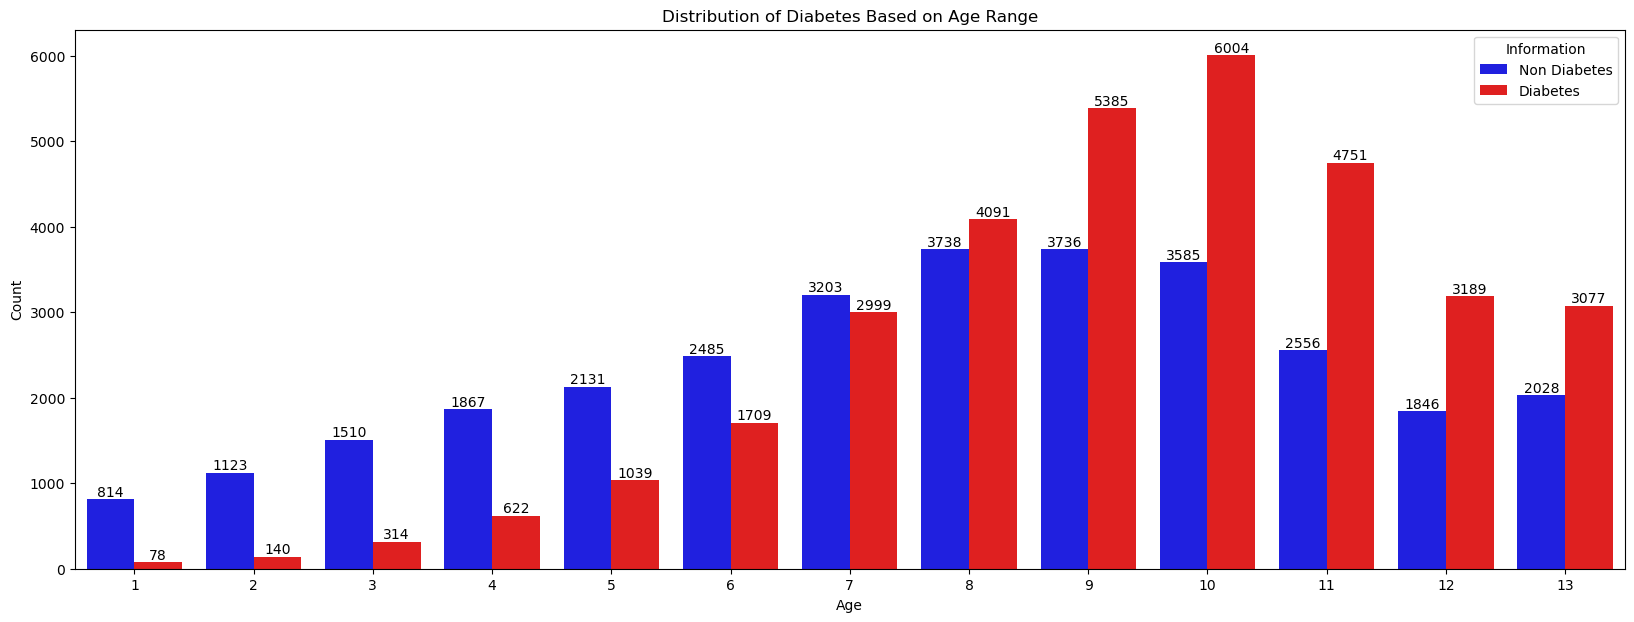

In [17]:
# countplot
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='Age', hue='Diabetes', data=dataEDA, palette={0: 'blue', 1: 'red'}, linewidth=2.5)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(labels=['Non Diabetes','Diabetes'],title="Information" )
plt.title('Distribution of Diabetes Based on Age Range')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Insights:

1. The prevalence of diabetes increases with age.
   - The 65-69 year age group has the highest number of diabetes sufferers, followed by the 60-64 year and 70-74 year age groups.
   - The 18-24 year age group has the lowest number of diabetes sufferers.

2. The distribution of diabetes is uneven across all age groups.
   - There is a significant increase in the number of diabetes sufferers in groups 1-10.
   - There is a decrease in the number of diabetes sufferers in the 10-13 group.

Conclusion:

Diabetes is a serious disease that can affect all age groups, and prevention and treatment is needed at all age levels, with a focus on healthy lifestyles and public awareness.

## **4. Blood Pressure Pattern**

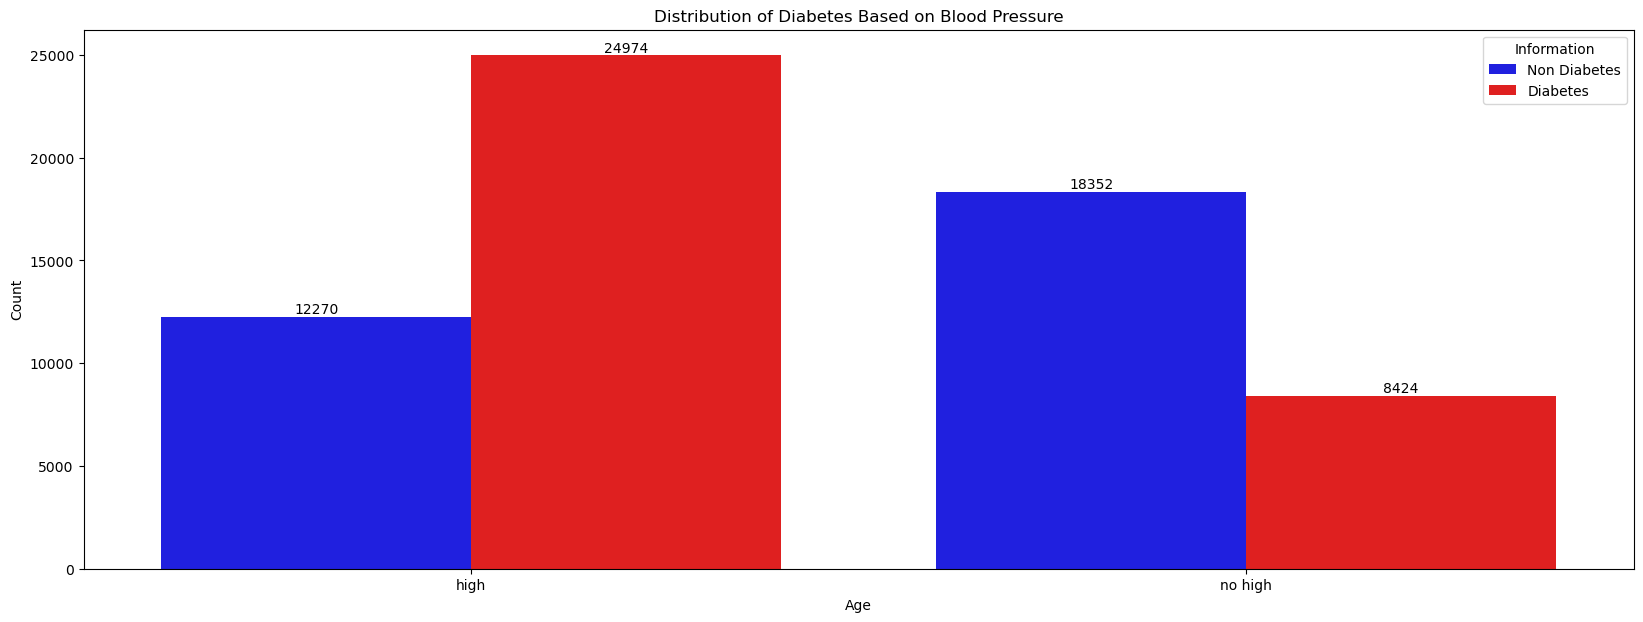

In [18]:
# countplot
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='HighBP', hue='Diabetes', data=dataEDA, palette={0: 'blue', 1: 'red'}, linewidth=2.5)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(labels=['Non Diabetes','Diabetes'],title="Information" )
plt.title('Distribution of Diabetes Based on Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Insights:

1. People with high blood pressure are more at risk of developing diabetes.
2. The number of people with diabetes who have high blood pressure is greater than those who do not have high blood pressure.
3. High blood pressure is a significant risk factor for diabetes

Conclusion:

It is important to control blood pressure to reduce the risk of developing diabetes.

## **5. Health Pattern**

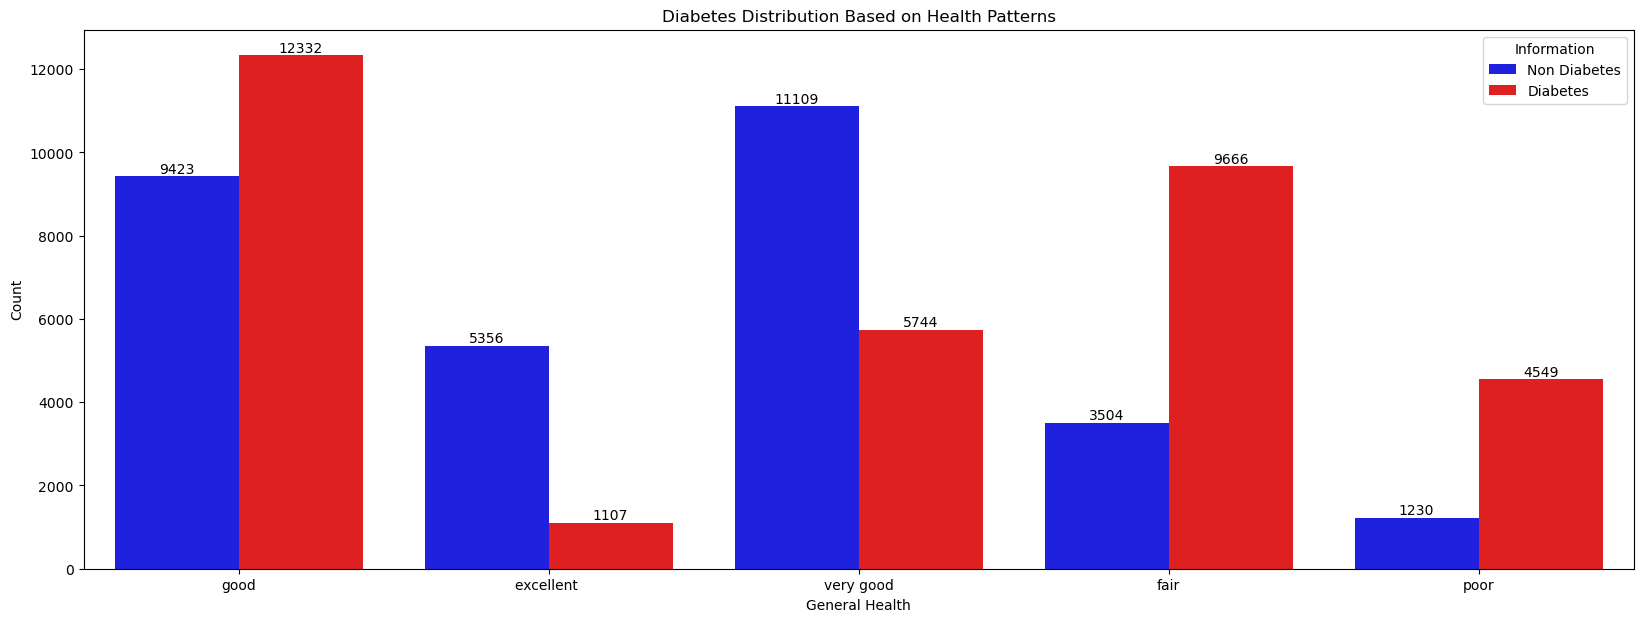

In [19]:
# countplot
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='GenHlth', hue='Diabetes', data=dataEDA, palette={0: 'blue', 1: 'red'}, linewidth=2.5)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(labels=['Non Diabetes','Diabetes'],title="Information" )
plt.title('Diabetes Distribution Based on Health Patterns')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.show()

Insights:

1. The 'Excelent' group has the lowest proportion of diabetes sufferers, but also has the lowest number of all health pattern groups.

2. The 'Good' group has the largest number of diabetes sufferers among all health pattern groups, but also includes a significant number of diabetes sufferers.

3. The 'Poor' group has the highest proportion of diabetes sufferers compared to other health pattern groups.

4. The 'Fair' group has a relatively high proportion of diabetes sufferers, but the number is smaller than the 'Good' group.

## **6. High Cholesterol Pattern**

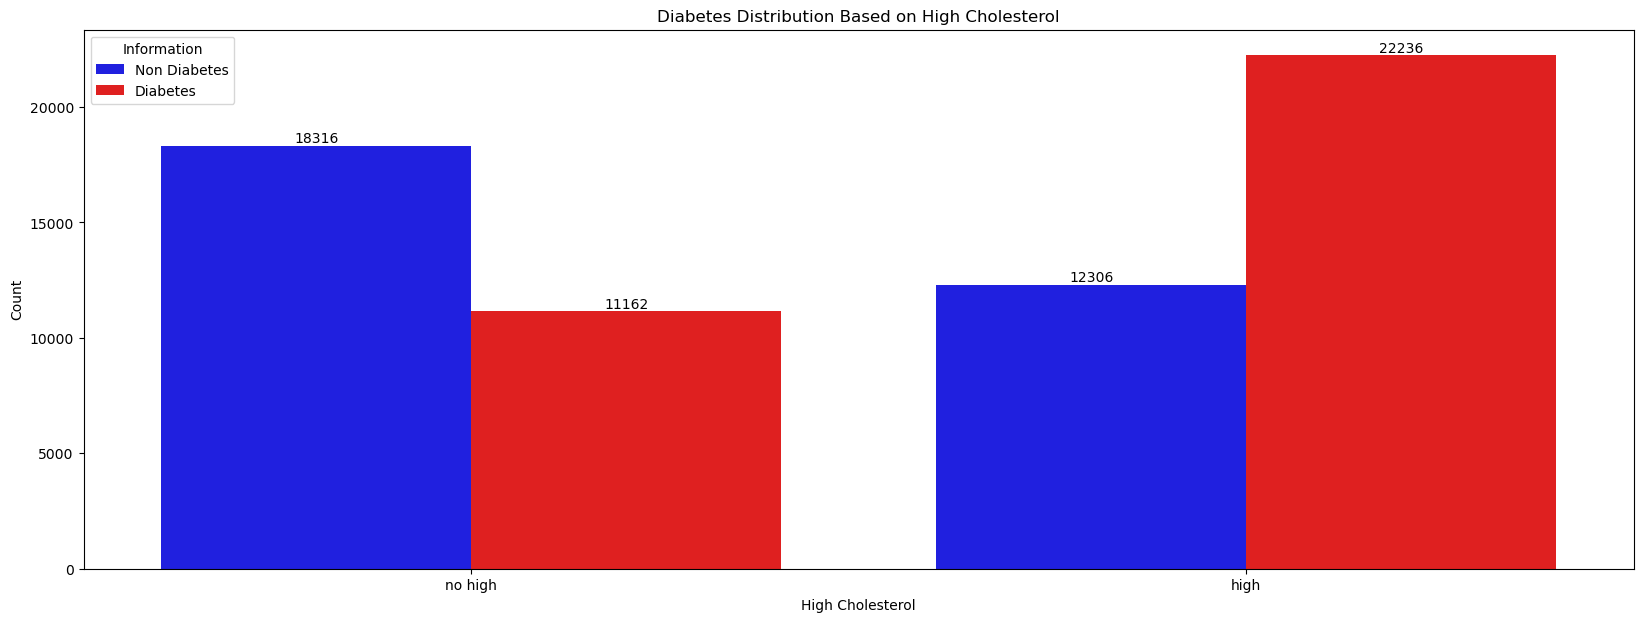

In [20]:
# countplot
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='HighChol', hue='Diabetes', data=dataEDA, palette={0: 'blue', 1: 'red'}, linewidth=2.5)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(labels=['Non Diabetes','Diabetes'],title="Information" )
plt.title('Diabetes Distribution Based on High Cholesterol')
plt.xlabel('High Cholesterol')
plt.ylabel('Count')
plt.show()

Insights:

1. Patients with high cholesterol constitute the majority of the diabetic and non-diabetic groups.
2. The proportion of diabetes sufferers is higher in people with high cholesterol than in people with low cholesterol.
3. Although the number of diabetes sufferers is higher in the high cholesterol group, there are still a large number of patients without diabetes.

## **7. Heart Disease Patterns**

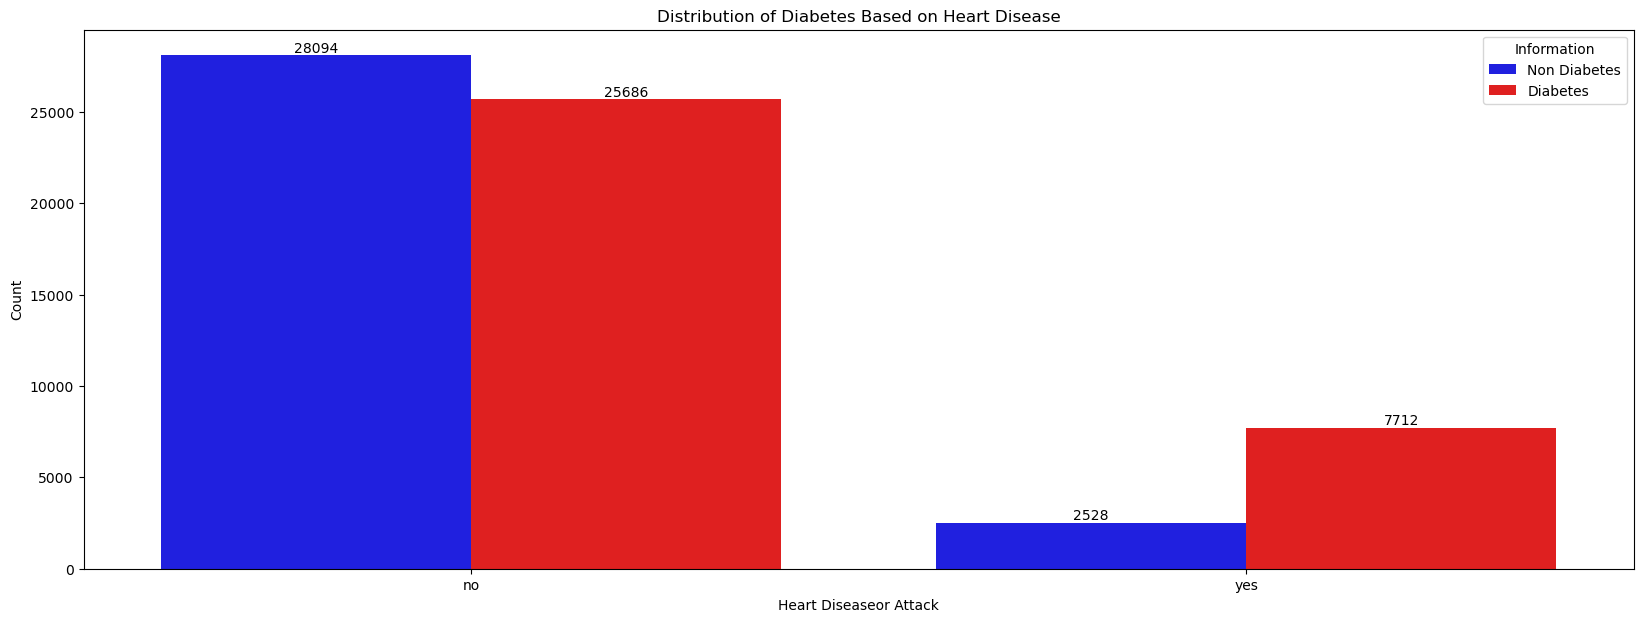

In [21]:
# countplot
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes', data=dataEDA, palette={0: 'blue', 1: 'red'}, linewidth=2.5)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(labels=['Non Diabetes','Diabetes'],title="Information" )
plt.title('Distribution of Diabetes Based on Heart Disease')
plt.xlabel('Heart Diseaseor Attack')
plt.ylabel('Count')
plt.show()

Insights:

1. Patients who have never had a heart attack account for a significant number of both groups, both diabetics and non-diabetics.
2. The proportion of patients with diabetes is higher among those who have had a heart attack compared to those who have never had a heart attack.
3. Although the number of patients with diabetes was higher in the group who had experienced a heart attack, there was still a sizable number of those who did not have diabetes in this group.

## **8. Fruit Consumption Patterns**

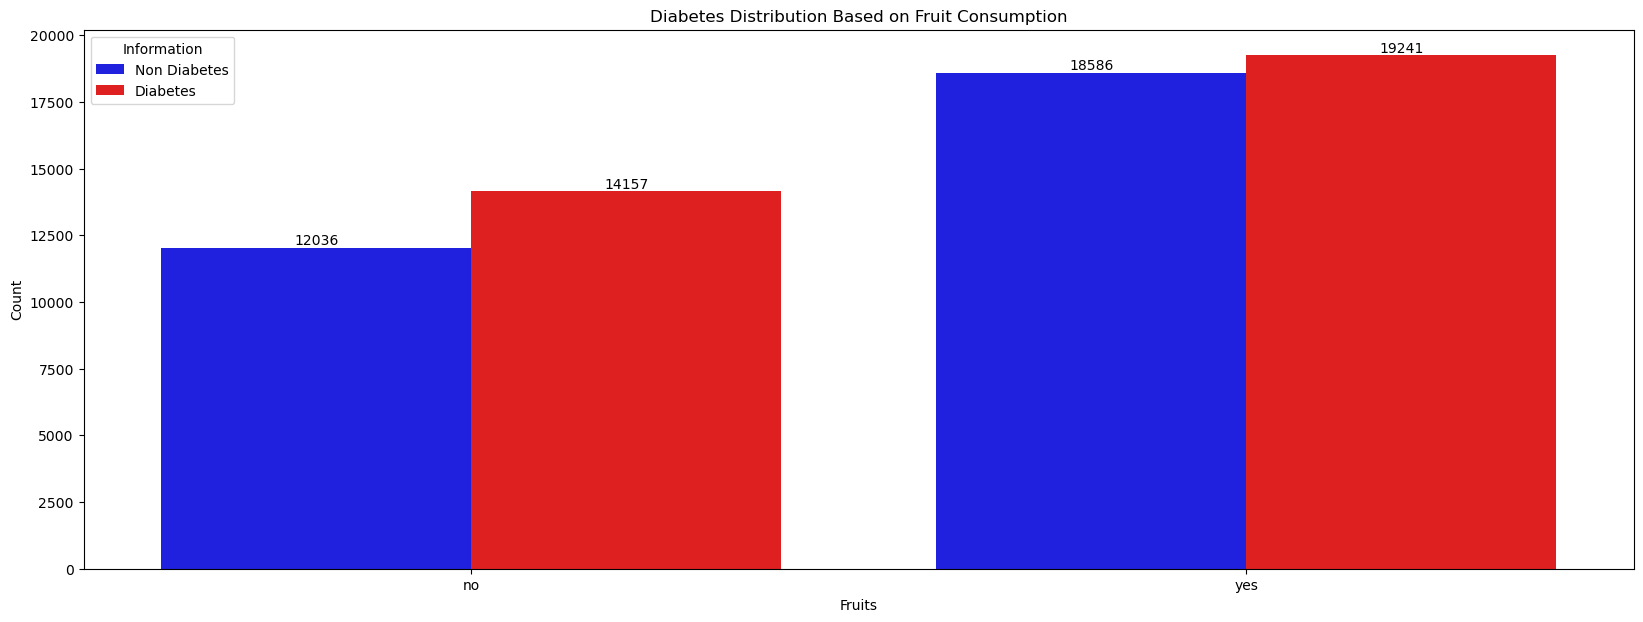

In [22]:
# countplot
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='Fruits', hue='Diabetes', data=dataEDA, palette={0: 'blue', 1: 'red'}, linewidth=2.5)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(labels=['Non Diabetes','Diabetes'],title="Information" )
plt.title('Diabetes Distribution Based on Fruit Consumption')
plt.xlabel('Fruits')
plt.ylabel('Count')
plt.show()

Insights:

1. Patients who eat fruit are in significant numbers from both groups, both diabetics and non-diabetics.
2. The proportion of patients with diabetes is higher among those who eat fruit compared to those who do not eat fruit.
3. Although the number of patients with diabetes was higher in the group that ate fruit, there was still a sizable number of those who did not have diabetes in this group

## **9. Vegetable Consumption Patterns**

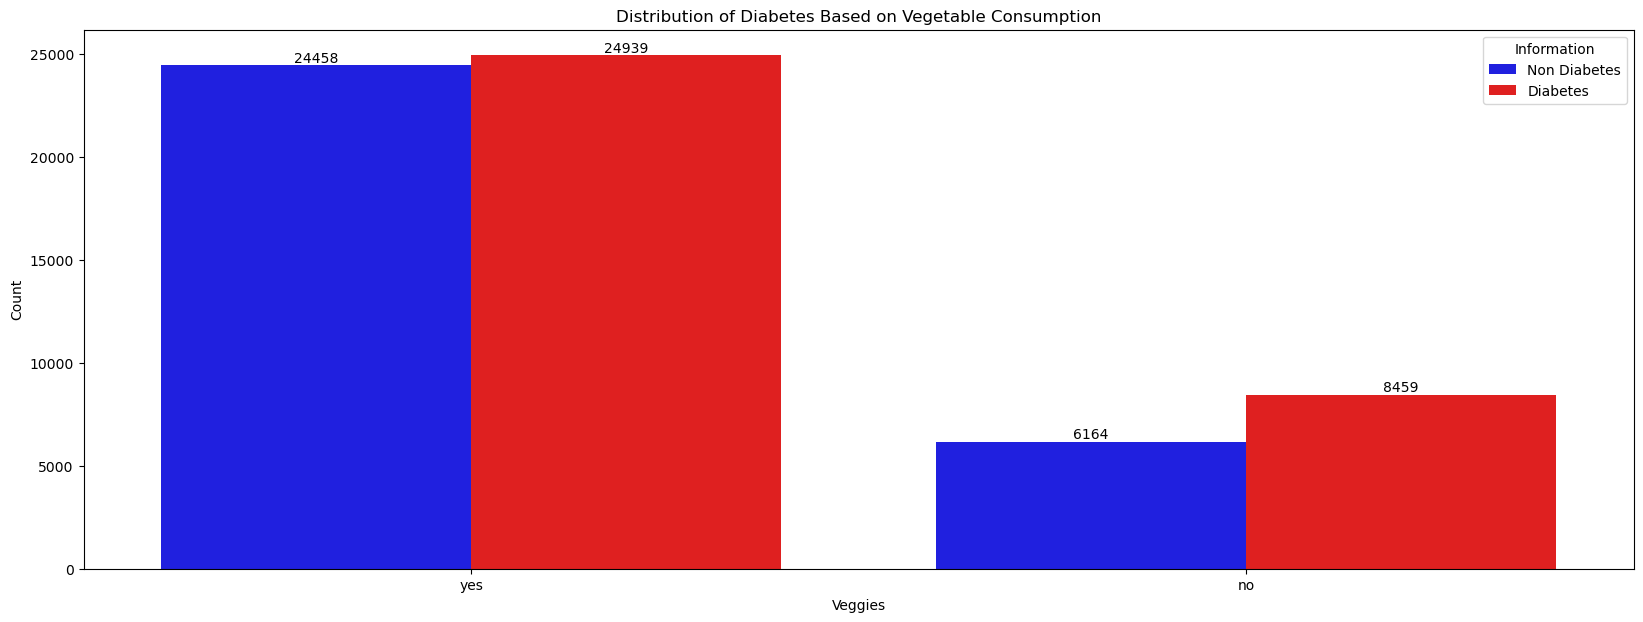

In [23]:
# Membuat countplot
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='Veggies', hue='Diabetes', data=dataEDA, palette={0: 'blue', 1: 'red'}, linewidth=2.5)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(labels=['Non Diabetes','Diabetes'],title="Information" )
plt.title('Distribution of Diabetes Based on Vegetable Consumption')
plt.xlabel('Veggies')
plt.ylabel('Count')
plt.show()

Insights:

1. There are a significant number of patients who eat vegetables from both groups, both diabetics and non-diabetics.
2. The proportion of patients with diabetes is higher among those who eat vegetables compared to those who do not eat vegetables.
3. Although the number of patients with diabetes was higher in the group that ate vegetables, there was still a sizable number of those who did not have diabetes in this group.

## **10. Alcohol Consumption Patterns**

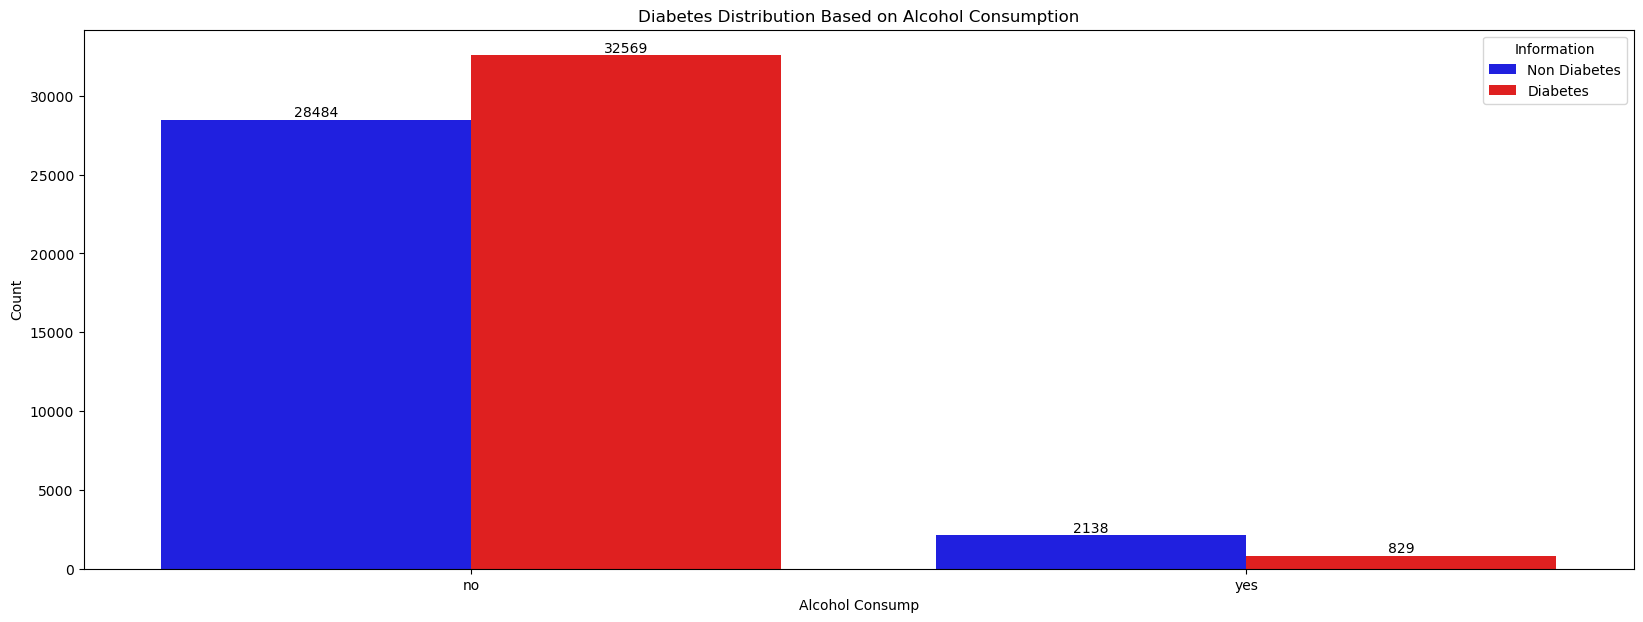

In [24]:
# Membuat countplot
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='HvyAlcoholConsump', hue='Diabetes', data=dataEDA, palette={0: 'blue', 1: 'red'}, linewidth=2.5)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(labels=['Non Diabetes','Diabetes'],title="Information" )
plt.title('Diabetes Distribution Based on Alcohol Consumption')
plt.xlabel('Alcohol Consump')
plt.ylabel('Count')
plt.show()

Insights:

1. Patients who do not consume alcohol constitute a significant number of both groups, both diabetics and non-diabetics.
2. The proportion of patients with diabetes is higher among those who do not consume alcohol compared to those who consume alcohol.
3. Although the number of patients with diabetes was higher in the group that did not consume alcohol, there was still a sizable number of those who consumed alcohol in this group.

# **E. Feature Engineering**

In [27]:
# copy data
dataModel = dataCleaning.copy()

## **1. Handling Cardinality**

Handling cardinality by:
1. Check category columns that have a large number of unique values
2. If there is, the column will be deleted

In [28]:
# Storing object data 
cat_cols = list(dataModel[['Age','Sex', 'HighChol', 'CholCheck','Smoker', 'HeartDiseaseorAttack', 
                           'Fruits', 'Veggies','HvyAlcoholConsump', 'GenHlth','DiffWalk',
                           'Stroke', 'HighBP', 'Diabetes']])

# Displays a column of type object and its unique value
listItem = []
for col in cat_cols:
  listItem.append([col, dataModel[col].nunique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique',], data=listItem)

,nama kolom,jumlah nilai unique
0,Age,13
1,Sex,2
2,HighChol,2
3,CholCheck,2
4,Smoker,2
5,HeartDiseaseorAttack,2
6,Fruits,2
7,Veggies,2
8,HvyAlcoholConsump,2
9,GenHlth,5


In this dataset, no columns with High Cardinality were found. After checking High Cardinality, a feature (X) and target (y) split will be carried out.

## **2. Split Feature and Target (X & y)**

In [29]:
# Split feature (X) and target (y)
X = dataModel.drop(['Diabetes'], axis = 1)
y = dataModel['Diabetes']

## **3. Split Train set dan Test Set**

In [30]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (48015, 17)
Test Size:  (16005, 17)


## **4. Handling Missing Value**

In [31]:
# missing value check (Train set)
X_train.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
dtype: int64

In [32]:
# missing value check (Test set)
X_test.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
dtype: int64

In [33]:
y_train.isna().sum()

0

In [34]:
y_test.isna().sum()

0

There are no missing values ​​in X_train, X_test, y_train and y_test

## **5. Handling Outliers**

Handling outliers by:
1. Look at the distribution value in the numerical column
2. If the value is -0.5 to 0.5 then it can be said that the distribution is normal and outliers will be handled using the Gaussian capping method from WinSorizer
3. If the value is less than -0.5 and more than 0.5 then it can be said that the skew and outlier distribution will be handled using the IQR capping method from Winsorizer

In [35]:
# Stores numeric data
num_cols = list(X_train[['BMI','MentHlth','PhysHlth']].columns)

# Displays numeric funds along with their distribution values
lower_limit = -0.05
upper_limit = 0.05
listItem= []
for col in num_cols:
    skew = X[col].skew()
    if lower_limit <= skew <= upper_limit:
        ket = 'normal'
    else :
        ket = 'skew'
    listItem.append([col, skew, ket])

pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribusi'], data= listItem)

,nama kolom,nilai skewness,distribusi
0,BMI,1.669602,skew
1,MentHlth,2.224306,skew
2,PhysHlth,1.513020,skew


In this numeric type column, the entire column is a skew distribution

**Action**
- Outliers will be handled using the winsorizer module from the feature engine, because the entire column is a skew distribution, it will be capped with iqr

In [36]:
# capping skew distribution
winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables= num_cols,
                            missing_values='ignore')

X_train_capped = winsoriser.fit_transform(X_train)
X_test_capped = winsoriser.transform(X_test)

In [37]:
# Function to create plots
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

BMI - Before Capping


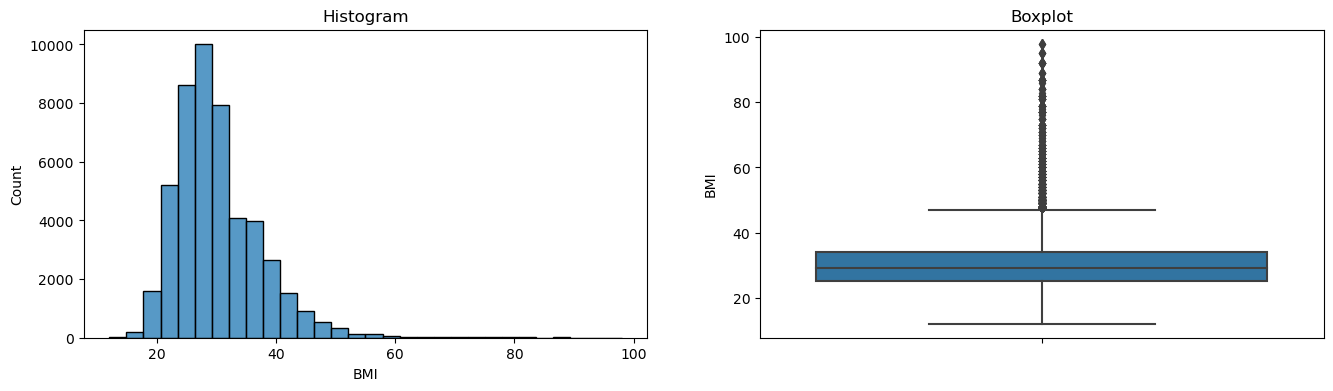


BMI - After Capping


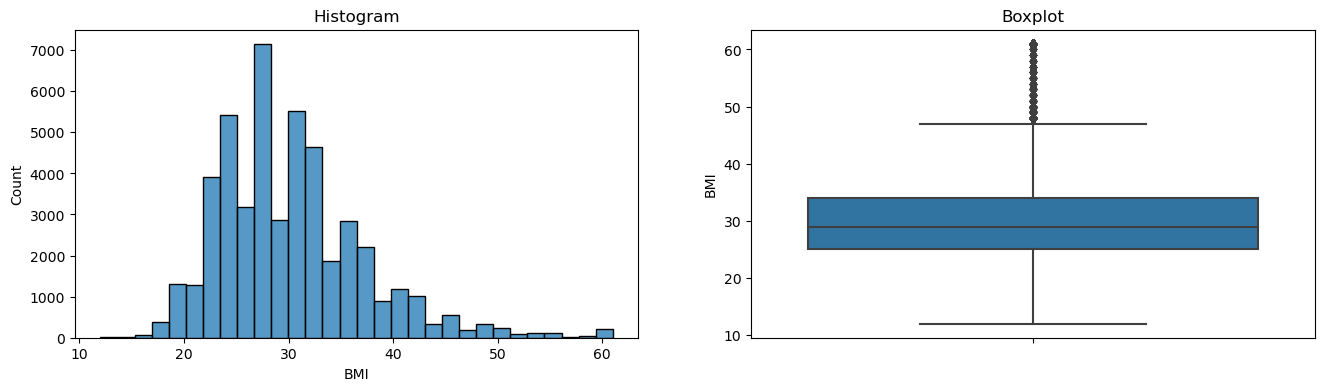

MentHlth - Before Capping


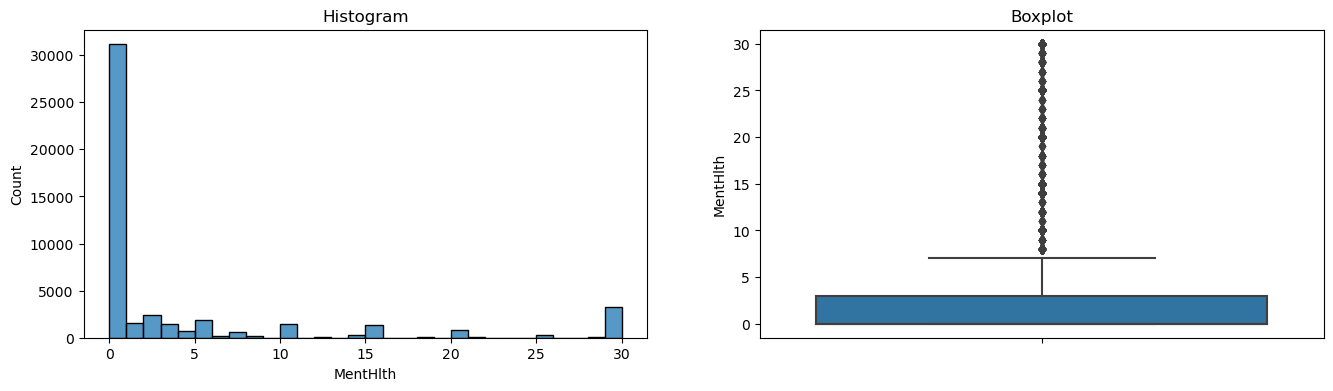


MentHlth - After Capping


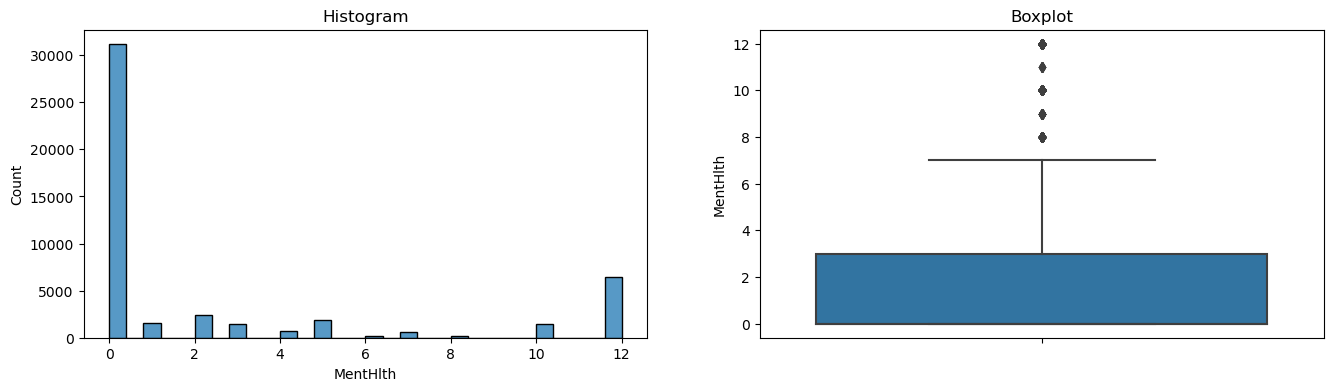

PhysHlth - Before Capping


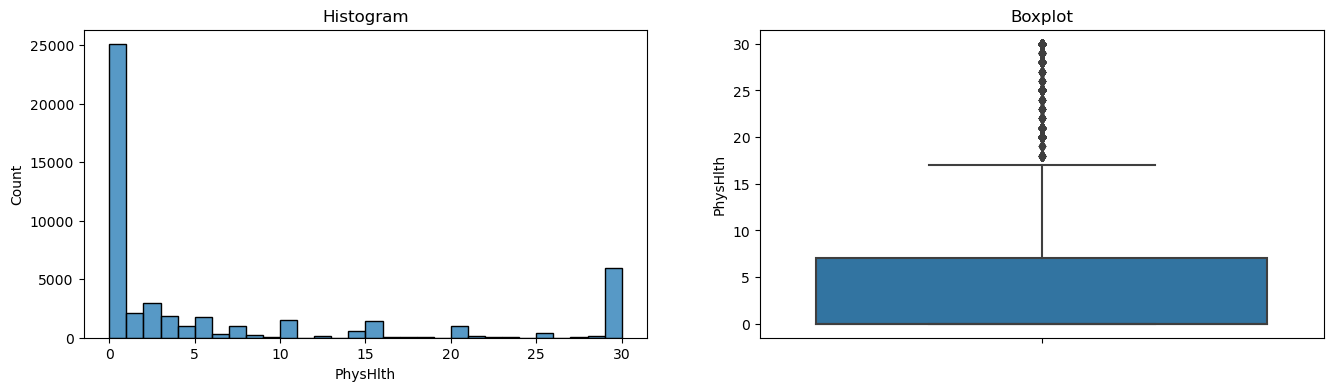


PhysHlth - After Capping


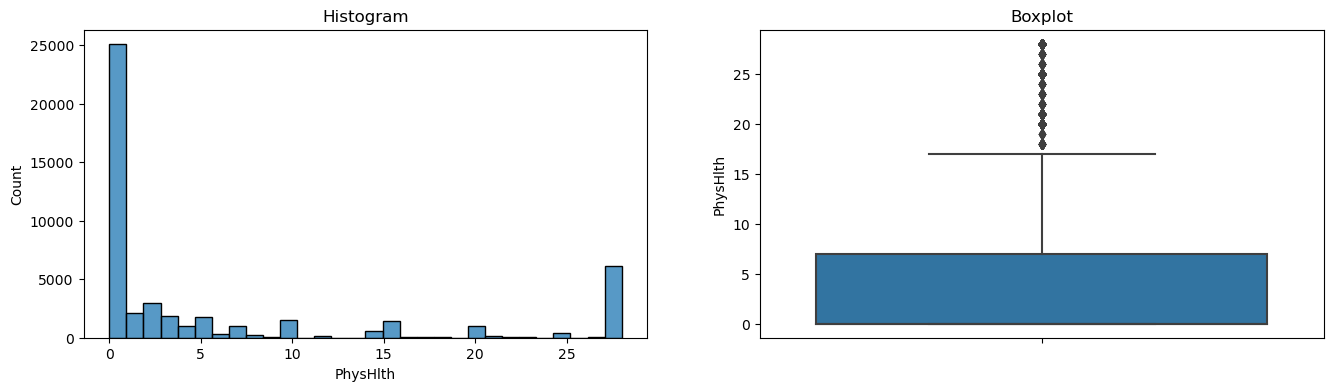

In [38]:
# Check distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

## **6. Split Numeric Column and Category Column**

In [39]:
# Stores numeric and category columns
num_columns = X_train[['BMI','MentHlth','PhysHlth']].columns.tolist()

cat_columns = X_train[['Age','Sex', 'HighChol', 'CholCheck','Smoker', 'HeartDiseaseorAttack', 
                        'Fruits', 'Veggies','HvyAlcoholConsump', 'GenHlth','DiffWalk',
                        'Stroke', 'HighBP']].columns.tolist()

print('Numeric Columns      : ', num_columns)
print('Categorical Columns  : ', cat_columns)

Numeric Columns      :  ['BMI', 'MentHlth', 'PhysHlth']
Categorical Columns  :  ['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Stroke', 'HighBP']


In [40]:
# Split train and test based on numeric and category
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## **7. Feature Selection**

At this feature selection stage, the correlation between the feature and the target will be tested:
1. If the feature is numerical then the correlation will be tested using Kendall Tau
2. If the feature is categorical, the correlation will be tested using chi-squared
3. After testing the correlation, in this task features that have no correlation will be deleted (dropped)

Kendall knows and numerically:
1. The reason for using Kendall Tau on numerical features is because the input data (feature) is numerical and the output (target) is categorical.
2. The reason for using chi-squared on categorical features is because the input data (feature) is categorical and the output (target) is categorical.

**Source :** [P1W1D3 PM page 15](https://www.kode.id/courses/take/full-time-data-analytics-phase-1/pdfs/47106282-day-3-pm-feature-engineering-part-2)

In [41]:
# Checking the correlation between numerical features and targets using Kendall Tau
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = kendalltau(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('tidak ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,BMI,ada korelasi
1,MentHlth,ada korelasi
2,PhysHlth,ada korelasi


In [42]:
# Checking the correlation between category features and targets using Chi-Squared
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  contingency_table = pd.crosstab(X_train_cat[col], y_train)

# Perform a chi-squared test
  chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('tidak ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,Age,ada korelasi
1,Sex,ada korelasi
2,HighChol,ada korelasi
3,CholCheck,ada korelasi
4,Smoker,ada korelasi
5,HeartDiseaseorAttack,ada korelasi
6,Fruits,ada korelasi
7,Veggies,ada korelasi
8,HvyAlcoholConsump,ada korelasi
9,GenHlth,ada korelasi


In this dataset all feature columns (X) have a correlation with the target (y)


# **F. Model Definition Menggunakan Pipeline**

At this stage we use a Column Transformer which contains:
- scaler using StandardScaler
- Encoding using OrdinalEncoder

After that, model definition is carried out using a pipeline. This dataset will be tested using 5 algorithms, namely:
- K-Nearest Neighbors (KNN)
- Support Vector Classification (SVC)
- DecisionTreeClassifier
- RandomForestClassifier
- AdaBoostClassifier (Boosting)

In [43]:
print('Numeric Columns      : ', num_columns)
print('Categorical Columns  : ', cat_columns)

Numeric Columns      :  ['BMI', 'MentHlth', 'PhysHlth']
Categorical Columns  :  ['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Stroke', 'HighBP']


In [44]:
# column transformer for preprocessing
preprocessing_pipeline = ColumnTransformer([
('scaler', StandardScaler(), num_columns),
('encoding', OrdinalEncoder(), cat_columns)
])

# Definition of the KNN algorithm using a pipeline
pipe_knn = Pipeline([
('preprocessing', preprocessing_pipeline),
('classifier', KNeighborsClassifier())
])

# Definition of the SVC Algorithm using a pipeline
pipe_svc = Pipeline([
('preprocessing', preprocessing_pipeline),
('classifier', SVC())
])

# Definition of the Decision Tree Algorithm using a pipeline
pipe_dt = Pipeline([
('preprocessing', preprocessing_pipeline),
('classifier', DecisionTreeClassifier())
])

# Definition of the Random Forest Algorithm using a pipeline
pipe_rf = Pipeline([
('preprocessing', preprocessing_pipeline),
('classifier', RandomForestClassifier())
])

# Definition of the AdaBoost (Boosting) algorithm using a pipeline
pipe_boost = Pipeline([
('preprocessing', preprocessing_pipeline),
('classifier', AdaBoostClassifier(RandomForestClassifier(max_depth=2, random_state=22)))
])


# **G. Model Evaluation, Training and Hyperparameter Tuning**

At this evaluation model stage we will use the `Recall` matrix, because:
False negative prediction errors (prediction of not diabetes, actually diabetes) in diabetes prediction models can have serious consequences for a person's health if not detected in time. Patients at high risk of developing undetected diabetes may miss the opportunity for early intervention, treatment, and timely management of the disease, thereby worsening the condition and increasing the risk of serious complications

## **1. K-Nearest Neighbors (KNN)**

In [45]:
# Train Model
pipe_knn.fit(X_train, y_train)

# predictions
y_knn_pred = pipe_knn.predict(X_test)
y_knn_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [46]:
#Model Evaluation
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  0.7858
Testing Score:  0.6893


In [47]:
# classification report from knn
target = ['No Diabetes', 'Diabetes']

print(classification_report(y_test, y_knn_pred, target_names = target))

              precision    recall  f1-score   support

 No Diabetes       0.69      0.64      0.67      7746
    Diabetes       0.69      0.73      0.71      8259

    accuracy                           0.69     16005
   macro avg       0.69      0.69      0.69     16005
weighted avg       0.69      0.69      0.69     16005



In [48]:
#Cross Validation
recall_train_cross_val = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

recall Score - All - Cross Validation  :  [0.73329356 0.73428799 0.73369133 0.72474145 0.73900935]
recall Score - Mean - Cross Validation :  0.7330047338643402
recall Score - Std - Cross Validation  :  0.004616034532060805
recall Score - Range of Test-Set       :  0.7283886993322793 - 0.737620768396401


Based on the results of the model using the KNN algorithm, there are several things that can be noted:

1. Model Performance:
   - A train score of 0.7858 and a testing score of 0.6893 indicate overfitting, where the model tends to fit the training data too well but is unable to generalize well to the test data.
   
2. Model Performance Evaluation:
   - Even though overfitting occurs, the recall matrix results show quite good performance. This shows that although the model tends to overfit, its ability to recognize certain classes (for example the positive class) is relatively good.
   
3. Cross Validation:
   - The average cross validation value is 0.733 with a standard deviation of 0.0046 indicating consistency in model performance. The relatively high average value indicates that the model has a good ability to learn patterns from the data, although attention still needs to be paid to overcome overfitting.

It can be concluded, although the KNN model shows quite good performance in recognizing certain classes, overfitting is a major concern that needs to be addressed. Steps such as regularization or the use of dimensionality reduction techniques can be a solution to improve model generalization.

## **2. Support Vector Classification (SVC)**

In [49]:
# Train Model
pipe_svc.fit(X_train, y_train)

# prediction
y_svc_pred = pipe_svc.predict(X_test)
y_svc_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [50]:
#Model Evaluation
print('Training Score: ',round(pipe_svc.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svc.score(X_test, y_test),4))

Training Score:  0.7362
Testing Score:  0.7338


In [51]:
# classification report from svc
target = ['No Diabetes', 'Diabetes']

print(classification_report(y_test, y_svc_pred, target_names = target))

              precision    recall  f1-score   support

 No Diabetes       0.77      0.64      0.70      7746
    Diabetes       0.71      0.82      0.76      8259

    accuracy                           0.73     16005
   macro avg       0.74      0.73      0.73     16005
weighted avg       0.74      0.73      0.73     16005



In [52]:
#Cross Validation
recall_train_cross_val = cross_val_score(pipe_svc,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

recall Score - All - Cross Validation  :  [0.81662689 0.82140016 0.81742243 0.81762132 0.81738611]
recall Score - Mean - Cross Validation :  0.8180913836959022
recall Score - Std - Cross Validation  :  0.0016887033307943441
recall Score - Range of Test-Set       :  0.8164026803651079 - 0.8197800870266965


Based on the results of the analysis of the model using the SVC (Support Vector Classifier) ​​algorithm, several important findings have been identified:

1. Model performance:
    - Overall looks very good. There is good agreement between the training score (0.7362) and the testing score (0.7338), indicating that the model is able to provide consistent results both on the data used for training and on new data.

2. Performance evaluation:
    - The model in terms of the recall matrix shows very satisfactory results, namely 0.82. This indicates that the model is able to identify classes with a high success rate, which is a very good indication in the context of classifiers.

3. Cross validation:
    - shows an average value of 0.8180 with a standard deviation of 0.0016. This high mean value indicates good consistency in model performance, while the low standard deviation indicates that the variation in performance between cross validation folds is very small.

It can be concluded that the SVC model has provided very satisfactory results. Good performance on training scores, testing scores, recall matrix, and cross validation shows that the model is able to perform classification with high accuracy and is able to generalize well on new data. As a result, this model is reliable for practical applications in data processing and decision making.

## **3. Decision Tree Classifier**

In [53]:
# Train Model
pipe_dt.fit(X_train, y_train)

# prediction
y_dt_pred = pipe_dt.predict(X_test)
y_dt_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [54]:
#Model Evaluation
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  0.9705
Testing Score:  0.6246


In [55]:
# classification report from dt
target = ['No Diabetes', 'Diabetes']

print(classification_report(y_test, y_dt_pred, target_names = target))

              precision    recall  f1-score   support

 No Diabetes       0.61      0.63      0.62      7746
    Diabetes       0.64      0.62      0.63      8259

    accuracy                           0.62     16005
   macro avg       0.62      0.62      0.62     16005
weighted avg       0.63      0.62      0.62     16005



In [56]:
#Cross Validation
recall_train_cross_val = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

recall Score - All - Cross Validation  :  [0.63206046 0.62052506 0.63206046 0.62887828 0.64153571]
recall Score - Mean - Cross Validation :  0.6310119942604289
recall Score - Std - Cross Validation  :  0.006745007445543781
recall Score - Range of Test-Set       :  0.6242669868148851 - 0.6377570017059726


Based on the results of the analysis of the model using the Decision Tree algorithm, there are several findings that need attention:

1. Model performance:
    - It can be seen that there is a significant difference between the training score (0.9705) and the testing score (0.621), indicating overfitting. The model tends to overfit the training data but is unable to generalize well to the test data. This can result in poor performance on previously unseen data.

2. Model Performance Evaluation:
    - The recall matrix value of 0.62 indicates unsatisfactory performance in recognizing certain classes. This indicates that the Decision Tree model may have difficulty identifying classes with a high success rate.

3. Cross Validation:
    - The average cross validation value is 0.6278 with a standard deviation of 0.0078, indicating that the model has consistent performance in learning patterns from the data. However, the relatively low average value indicates that the model has quite ordinary performance in predicting new data.

It can be concluded that although the Decision Tree model may be able to provide good results on training data, the presence of overfitting and unsatisfactory performance on test data as well as low values ​​on the recall matrix indicate that this model requires adjustment and improvement. Steps such as parameter tuning, use of ensemble techniques, or use of more complex algorithms are needed to improve the generalization ability and performance of the model on previously unseen data.

## **4. Random Forest Classifier**

In [57]:
# Train Model
pipe_rf.fit(X_train, y_train)

# prediction
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [58]:
# Model Evaluation
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  0.9705
Testing Score:  0.6952


In [59]:
# classification report from rf
target = ['No Diabetes', 'Diabetes']

print(classification_report(y_test, y_rf_pred, target_names = target))

              precision    recall  f1-score   support

 No Diabetes       0.70      0.64      0.67      7746
    Diabetes       0.69      0.75      0.72      8259

    accuracy                           0.70     16005
   macro avg       0.70      0.69      0.69     16005
weighted avg       0.70      0.70      0.69     16005



In [60]:
#Cross Validation
recall_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

recall Score - All - Cross Validation  :  [0.74502784 0.74622116 0.75       0.74264121 0.75293416]
recall Score - Mean - Cross Validation :  0.7473648740714225
recall Score - Std - Cross Validation  :  0.0036617914243395402
recall Score - Range of Test-Set       :  0.743703082647083 - 0.751026665495762


Based on the results of the analysis of the model using the Random Forest algorithm, several important findings can be identified:

1. Model performance:
    - It can be seen that there is a significant difference between the training score (0.9705) and the testing score (0.695), indicating overfitting. This indicates that the model tends to overfit the training data and may not generalize well to new test data.

2. Model Performance Evaluation:
    - With a recall matrix value of 0.75, the Random Forest model shows relatively good performance in recognizing certain classes. This indicates that the model is able to identify classes with a fairly high success rate.

3. Cross Validation:
    - The results of cross validation show an average value of 0.7456 with a standard deviation of 0.0033. This relatively high mean value indicates that the model has good performance in learning patterns from the data, while a low standard deviation indicates good consistency in model performance.

It can be concluded that the Random Forest model provides quite satisfactory results. Even though overfitting occurs, the model is able to provide good performance on the test score and recall matrix. Additionally, the results from cross validation show consistency in model performance. However, it is important to remember that dealing with overfitting remains the main focus to improve the generalization ability of the model on previously unseen data.

## **5. Boosting (AdaBoostClassifier)**

In [61]:
# Train Model
pipe_boost.fit(X_train, y_train)

# prediction
y_boost_pred = pipe_boost.predict(X_test)
y_boost_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [62]:
# Model Evaluation
print('Training Score: ',round(pipe_boost.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_boost.score(X_test, y_test),4))

Training Score:  0.7436
Testing Score:  0.7397


In [63]:
# classification report from adaboost
target = ['No Diabetes', 'Diabetes']

print(classification_report(y_test, y_boost_pred, target_names = target))

              precision    recall  f1-score   support

 No Diabetes       0.76      0.68      0.72      7746
    Diabetes       0.73      0.80      0.76      8259

    accuracy                           0.74     16005
   macro avg       0.74      0.74      0.74     16005
weighted avg       0.74      0.74      0.74     16005



In [64]:
#Cross Validation
recall_train_cross_val = cross_val_score(pipe_boost,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     scoring="recall")

print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

recall Score - All - Cross Validation  :  [0.79097056 0.79534606 0.80171042 0.7947494  0.79629998]
recall Score - Mean - Cross Validation :  0.7958152863953901
recall Score - Std - Cross Validation  :  0.0034587614164896087
recall Score - Range of Test-Set       :  0.7923565249789005 - 0.7992740478118797


Based on the results of the analysis of the model using the AdaboostClassifier algorithm, several important findings have been identified:

1. Model performance:
    - From the results, it can be seen that there is a quite significant difference between the training score (0.7425) and the testing score (0.7399), indicating overfitting. This indicates that the model may overfit the training data and not generalize well to the test data.

2. Model Performance Evaluation:
    - With a recall matrix value of 0.80, the AdaboostClassifier model shows good performance in recognizing certain classes. This indicates that the model is able to identify classes with a fairly high success rate.

3. Cross Validation:
    - The results of cross validation show an average value of 0.7960 with a standard deviation of 0.0028. This relatively high mean value indicates that the model has good performance in learning patterns from the data, while a low standard deviation indicates good consistency in model performance.

From this conclusion, even though overfitting occurs, the AdaboostClassifier model is still able to provide good performance on the test score and recall matrix. Additionally, the cross validation results show consistency in model performance. However, handling overfitting remains an important aspect that needs to be considered to improve the generalization ability of the model on new data.

# **H. Conclusions from the 5 Algorithms:**

Based on the comparison above, the algorithm that provides the best results is SVC. Even though it has a little overfitting, SVC has a high test score, good recall matrix value, and high average cross validation results. This shows that SVC is able to provide a good balance between generalization ability and performance on test data.

# **I. Model Optimization - Hyperparameter Tuning SVC**

In [65]:
# Parameter SVC
param_grid_svc = {'classifier__C': [100, 1000, 10000],  
                  'classifier__gamma': [0.001, 0.0001, 0.00001], 
                  } 

In [66]:
# GridSearchCV
clf_grid_svc = GridSearchCV(pipe_svc, param_grid=param_grid_svc, cv=2)
clf_grid_svc.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['BMI',
                                                                          'MentHlth',
                                                                          'PhysHlth']),
                                                                        ('encoding',
                                                                         OrdinalEncoder(),
                                                                         ['Age',
                                                                          'Sex',
                                                                          'HighChol',
                                                                          'CholCheck',
                                                                          'Smoker',
                                                                          'HeartDiseaseorAttack',
                                                                          'Fruits',
                                                                          'Veggies',
                                                                          'HvyAlcoholConsump',
                                                                          'GenHlth',
                                                                          'DiffWalk',
                                                                          'Stroke',
                                                                          'HighBP'])])),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [100, 1000, 10000],
                         'classifier__gamma': [0.001, 0.0001, 1e-05]})

In [67]:
# best_params
best_params_svc = clf_grid_svc.best_params_
best_params_svc

{'classifier__C': 100, 'classifier__gamma': 0.001}

In [68]:
# best_estimator
best_estimator_svc = clf_grid_svc.best_estimator_
best_estimator_svc

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('encoding', OrdinalEncoder(),
                                                  ['Age', 'Sex', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'HeartDiseaseorAttack',
                                                   'Fruits', 'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'GenHlth', 'DiffWalk',
                                                   'Stroke', 'HighBP'])])),
                ('classifier', SVC(C=100, gamma=0.001))])

In [69]:
# Get Particular Steps
best_estimator_svc.named_steps['classifier']

SVC(C=100, gamma=0.001)

In [70]:
# Train Model
best_estimator_svc.fit(X_train, y_train)

# prediction
y_best_svc_pred = best_estimator_svc.predict(X_test)
y_best_svc_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [80]:
# Model Evaluation
print('Training Best Estimator SVC - Training Score : ',round(best_estimator_svc.score(X_train, y_train),4))
print('Testing Best Estimator SVC - Testing Score  : ', round(best_estimator_svc.score(X_test, y_test),4))

Training Best Estimator SVC - Training Score :  0.7358
Testing Best Estimator SVC - Testing Score  :  0.7346


In [72]:
# classification report dari knn
target = ['No Diabetes', 'Diabetes']

print(classification_report(y_test, y_best_svc_pred, target_names = target))

              precision    recall  f1-score   support

 No Diabetes       0.77      0.64      0.70      7746
    Diabetes       0.71      0.82      0.76      8259

    accuracy                           0.73     16005
   macro avg       0.74      0.73      0.73     16005
weighted avg       0.74      0.73      0.73     16005



In [73]:
#Cross Validation
recall_train_cross_val = cross_val_score(best_estimator_svc,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     scoring="recall")

print('-- Best Estimator SVC --\n')
print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

-- Best Estimator SVC --

recall Score - All - Cross Validation  :  [0.81841687 0.82120127 0.81702466 0.81563246 0.8142033 ]
recall Score - Mean - Cross Validation :  0.8172957121440799
recall Score - Std - Cross Validation  :  0.002404714986498686
recall Score - Range of Test-Set       :  0.8148909971575813 - 0.8197004271305786


1. Based on the results of hyperparameter tuning, the best parameters are **C : 100** and **gamma : 0.001**.

2. **Overfitting :**
    - There are indications of overfitting, because there is a fairly small difference between the training score (0.7358) and the testing score (0.7346). Although the differences are small, they still indicate that the model tends to overfit the training data and may not be able to generalize well to the test data.

3. **Recall Matrix Performance:**
    - The high recall matrix value (0.82) indicates that the model has good abilities in recognizing certain classes. This indicates that the model can identify positive classes with a high success rate.

4. **Cross Validation :**
    - The results of cross validation show an average value of 0.8172 with a standard deviation of 0.0024. This high mean value indicates that the model has good performance in learning patterns from the data, while a low standard deviation indicates good consistency in model performance.

Thus, even though there are indications of overfitting, the SVC model that has been hyperparameter tuned shows quite good performance. The model's ability to recognize certain classes, shown by the high recall matrix value, and consistency in model performance, shown by the cross validation results, indicate that the model can be relied on in carrying out classification. Nevertheless, handling overfitting can still be a major concern to improve the generalization ability of the model on new data.

# **J. Conclusions from the SVC Algorithm Before and After Hyperparameter Tuning**

|                        | Before Hyperparameter Tuning | After Hyperparameter Tuning |
|------------------------|-------------------------------|------------------------------|
| Train Score            | 0.7362                        | 0.7358                       |
| Testing Score          | 0.7338                        | 0.7346                       |
| Recall Matrix          | 0.82                          | 0.82                         |
| Cross Validation (Mean)| 0.8180                        | 0.8172                       |
| Cross Validation (Std) | 0.0016                        | 0.0024                       |

**Difference :**
- **Cross Validation :** There was a small decrease in the average cross validation results after hyperparameter tuning (0.8172) compared to before (0.8180). However, the standard deviation slightly increases after tuning (0.0024) compared to before (0.0016), indicating a slight increase in variation in model performance.

**Conclusion :**
- Based on these values, the SVC model before hyperparameter tuning can be considered the best in terms of more consistent performance on never-before-seen test data. Although hyperparameter tuning may not provide a significant improvement in model performance in this case, the model before tuning has shown slightly better results. `Therefore, the SVC model before hyperparameter tuning can be selected as the best in this context`.

# **K. Model Saving**

In [77]:
#Save the Files
with open('model.pkl', 'wb') as file_1:
  pickle.dump(pipe_svc, file_1)

# **L. Conclusion**

1. Diabetes is a serious disease that can affect all age groups. The risk of diabetes is closely related to high blood pressure, where individuals who experience this condition have a higher risk of developing diabetes. Additionally, people with diabetes tend to have high blood pressure, highlighting the interrelationship between the two conditions.

2. High cholesterol is also a significant risk factor for diabetes, with the majority of diabetic and non-diabetic patients having high cholesterol levels. The proportion of people with diabetes tends to be higher in those with high cholesterol levels than in those with low levels, although there are still a large number of patients without diabetes among those with high cholesterol. Therefore, efforts to prevent and treat diabetes need to pay attention to managing blood pressure and cholesterol to reduce the risk and impact of this disease.

3. Based on a comparison of the KNN, SVC, Decision Tree, Random Forest and AdaBoostClassifier algorithms. The algorithm that provides the best results is SVC. Even though it has a little overfitting, SVC has a high test score, a good recall matrix value (0.82), and the results of cross validation show that the model is able to perform classification with high accuracy and is able to generalize well on new data. This shows that SVC is able to provide a good balance between generalization ability and performance on test data.

4. Based on the comparison of SVC before and after hyperparameter tuning, the SVC model before hyperparameter tuning can be considered the best in terms of more consistent performance on never-before-seen test data. Although hyperparameter tuning may not provide a significant improvement in model performance in this case, the model before tuning has shown slightly better results. Therefore, the SVC model before hyperparameter tuning can be selected as the best in this context.

5. Advantages and disadvantages of the SVC model:
    - Excess:
        - **Robust against Outliers:** SVC tends to be more robust against outliers or outliers in the data because it uses a maximum margin to separate classes.
        - **Generating Optimal Decision Boundaries:** SVC attempts to maximize the margin between separated classes, making it possible to construct optimal decision boundaries.

    - Lack:
        - **Requires High Computation Time:** Especially on large datasets, SVC requires relatively high computation time to train the model, especially when using complex kernels or on feature spaces that have many dimensions.

6. To improve the SVC model, several model improvement steps that can be taken are:
    - **Hyperparameter Optimization :** Performs hyperparameter retuning to find better combinations that can improve model performance.
    - **Feature Engineering :** Perform further analysis of the features used in the model and identify whether there are any features that can be added, removed, or changed to improve the separation between target classes.
